In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from scipy import stats

#### Order items

In [2]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [70]:
order_items[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


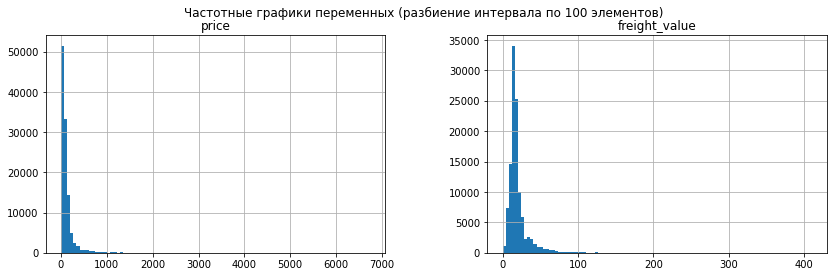

In [76]:
# Построим гистограммы распределения для двух количественных переменных
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items[['price']].hist('price', bins=100, ax=axes[0])
order_items[['freight_value']].hist('freight_value', bins=100, ax=axes[1])
fig.suptitle('Частотные графики переменных (разбиение интервала по 100 элементов)', fontsize=12)
plt.show()

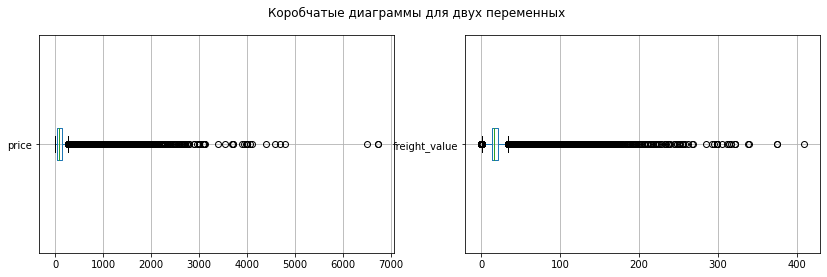

In [6]:
#  И графики box plot
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items[['price']].boxplot(rot=0, ax=axes[0], vert=False)
order_items[['freight_value']].boxplot(rot=0, ax=axes[1], vert=False)
fig.suptitle('Коробчатые диаграммы для двух переменных', fontsize=12)
plt.show()

In [ ]:
# Для обех переменных распределение похоже на лонгнормальное (натуральный логарифм таких им. нормальное распределение)

In [23]:
# Чтобы подтвердить предположение о логнормальном распределении переменных
# order_items_lg = order_items.assign(order_items['ln_price'] == np.log(order_items['price']), order_items['ln_freight_value'] == np.log(order_items['freight_value']))
order_items_lg = order_items.assign(**{'lg_price': np.log(order_items['price']), 'lg_freight_value': np.log(order_items['freight_value'])})
order_items_lg

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,lg_price,lg_freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,4.075841,2.587012
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5.480222,2.992226
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,5.293305,2.883123
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2.564180,2.548664
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5.297817,2.898119
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,5.703749,3.770690
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,5.857933,3.598134
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,4.604170,2.830268
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4.025173,2.165619


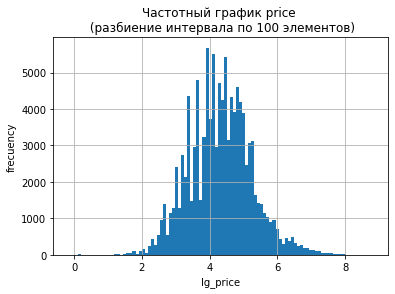

In [24]:
# Для переменной price предположение подтверждается:
n, bins, patches = plt.hist(order_items_lg['lg_price'], 100)

plt.xlabel('lg_price')
plt.ylabel('frecuency')
plt.title('Частотный график price \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [28]:
# Для переменной freight_value были нулевые значения, для которых натуральный логарифм не определен
order_items_lg.describe() # -> -inf - минус бесконечность

,order_item_id,price,freight_value,lg_price,lg_freight_value
count,112650.000000,112650.000000,112650.000000,112650.000000,1.126500e+05
mean,1.197834,120.653739,19.990320,4.317378,-inf
std,0.705124,183.633928,15.806405,0.925009,NaN
min,1.000000,0.850000,0.000000,-0.162519,-inf
25%,1.000000,39.900000,13.080000,3.686376,2.571084e+00
50%,1.000000,74.990000,16.260000,4.317355,2.788708e+00
75%,1.000000,134.900000,21.150000,4.904534,3.051640e+00
max,21.000000,6735.000000,409.680000,8.815073,6.015376e+00


In [77]:
# Фильтруем бесконечные малые (-inf) - это логарифмы нуля (функция определена, когда  x > 0)
# order_items_lg[order_items_lg['lg_freight_value'].isin([-np.inf])] 

In [ ]:
# Аномальные значения цен и стоимости доставки
# цены зависят от категории, доставка зависит, по крайней мере, от расстояния и весо-габаритных характеристик товаров

In [ ]:
# Сравним 3 подхода к определению выбросов:
# IQR (SD) среднее +/- 3SD (нормальное распределение) standard deviation (SD)
# MAD медиана +/- 2,5MAD (ненормальное распределение) median absolute deviation
# квантили 0,01 и 0,99

### 1,5xIQR (Interquartile range) rule

In [100]:
# from IPython.display import Image
# Image('https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png', width=400, height=400)

In [98]:
# Пограничные значения price, определяемые как границы потенциальных выбросов:
price_low = order_items['price'].quantile(.25) - 1.5*(order_items['price'].quantile(.75) - order_items['price'].quantile(.25))
price_high = order_items['price'].quantile(.75) + 1.5*(order_items['price'].quantile(.75) - order_items['price'].quantile(.25))
print(f'price: {price_low:.2f} - {price_high:.2f}')

price: -102.60 - 277.40


In [93]:
# Кол-во значений price за пределами 1,5xIQR:
len(order_items.loc[(order_items['price'] < price_low) | (order_items['price'] > price_high)])

8427

In [101]:
# Пограничные значения freight_value, определяемые как границы потенциальных выбросов:
freight_value_low = order_items.freight_value.quantile(.25) - 1.5*(order_items.freight_value.quantile(.75) - order_items.freight_value.quantile(.25))
freight_value_high = order_items.freight_value.quantile(.75) + 1.5*(order_items.freight_value.quantile(.75) - order_items.freight_value.quantile(.25))
print(f'freight_value: {freight_value_low:.2f} - {freight_value_high:.2f}')

freight_value: 0.98 - 33.25


In [102]:
# Кол-во значений freight_value за пределами 1,5xIQR:
len(order_items.loc[(order_items['freight_value'] < freight_value_low) | (order_items['freight_value'] > freight_value_high)])

12134

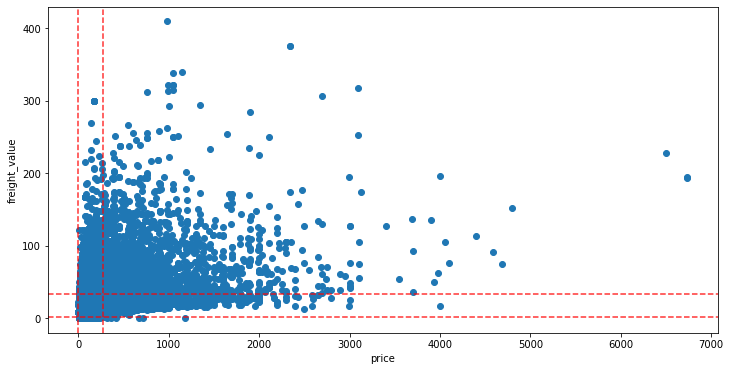

In [108]:
# Построим диаграмму рассеяния для двух переменных, также для идентификации выбросов
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(order_items['price'], order_items['freight_value'])
ax.set_xlabel('price')
ax.set_ylabel('freight_value')
# область, ограниченная пограничными значениями price и freight_value
plt.axvline(0, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.axvline(price_high, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.axhline(freight_value_low, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.axhline(freight_value_high, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.show()

In [115]:
# Исключим эти значения
order_items_IQRfiltered = order_items[(order_items['price'] < price_high) & (order_items['price'] > price_low)]
order_items_IQRfiltered.shape

(104223, 7)

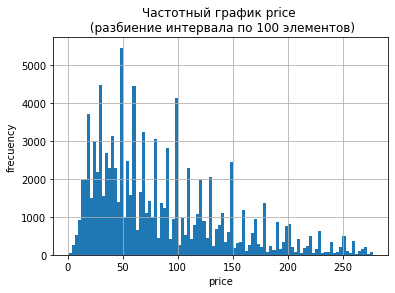

In [116]:
# Смотрим как изменилось распределение переменной price
n, bins, patches = plt.hist(order_items_IQRfiltered['price'], 100)

plt.xlabel('price')
plt.ylabel('frecuency')
plt.title('Частотный график price \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [117]:
# Пограничные значения freight_value, определяемые как границы потенциальных выбросов (пересчитали после удаления записей):
freight_value_low = order_items_IQRfiltered['freight_value'].quantile(.25) - 1.5*(order_items_IQRfiltered['freight_value'].quantile(.75) - order_items_IQRfiltered['freight_value'].quantile(.25))
freight_value_high = order_items_IQRfiltered['freight_value'].quantile(.75) + 1.5*(order_items_IQRfiltered['freight_value'].quantile(.75) - order_items_IQRfiltered['freight_value'].quantile(.25))
print(f'freight_value: {freight_value_low:.2f} - {freight_value_high:.2f}')

freight_value: 2.21 - 30.41


In [118]:
# Кол-во значений freight_value за пределами 1,5xIQR:
len(order_items_IQRfiltered.loc[(order_items_IQRfiltered['freight_value'] < freight_value_low) | (order_items_IQRfiltered['freight_value'] > freight_value_high)])

10248

In [121]:
# Исключим эти значения
order_items_IQRfiltered = order_items_IQRfiltered[(order_items_IQRfiltered['freight_value'] < freight_value_high) & (order_items_IQRfiltered['freight_value'] > freight_value_low)]
order_items_IQRfiltered.shape

(93975, 7)

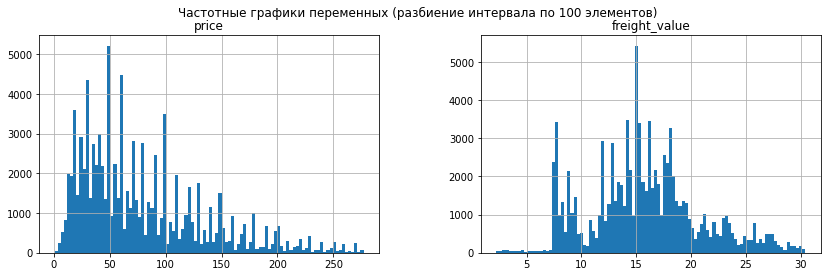

In [123]:
# Смотрим как изменилось распределение переменных:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items_IQRfiltered[['price']].hist('price', bins=100, ax=axes[0])
order_items_IQRfiltered[['freight_value']].hist('freight_value', bins=100, ax=axes[1])
fig.suptitle('Частотные графики переменных (разбиение интервала по 100 элементов)', fontsize=12)
plt.show()


In [125]:
order_items_IQRfiltered.shape

(93975, 7)

In [127]:
order_items_IQRfiltered.shape[0]/order_items.shape[0]

0.8342210386151797

In [124]:
order_items_IQRfiltered.describe()

,order_item_id,price,freight_value
count,93975.000000,93975.000000,93975.000000
mean,1.202373,79.191667,15.751864
std,0.709123,55.980034,5.113773
min,1.000000,0.850000,2.240000
25%,1.000000,35.700000,12.660000
50%,1.000000,60.600000,15.350000
75%,1.000000,109.900000,18.370000
max,21.000000,277.000000,30.410000


### 3xMAD (median absolute deviation) rule

In [5]:
MAD_price = stats.median_absolute_deviation(order_items['price'], scale=1) # где:
# scale=1 # масштабирующий коэффициент для нормального распределения
# scale=1/order_items['price'].quantile(.75) # масштабирующий коэффициент для симметричного распределения, отличного от нормального 
MAD_freight_value = stats.median_absolute_deviation(order_items['freight_value'], scale=1)
print(f'MAD_price: {MAD_price:.2f}')
print(f'MAD_freight_value: {MAD_freight_value:.2f}')
# np.median(np.absolute(x - np.median(x)))
# MAD_price = np.median(np.absolute(order_items['price'] - np.median(order_items['price'])))
# MAD_freight_value = np.median(np.absolute(order_items['freight_value'] - np.median(order_items['freight_value'])))

MAD_price: 42.09
MAD_freight_value: 3.61


In [15]:
# получаем более жесткие границы, чем при межквартильном расстоянии
print(f'price: {order_items.price.median()-3*MAD_price:.2f} - {order_items.price.median()+3*MAD_price:.2f}')
print(f'freight_value: {order_items.freight_value.median()-3*MAD_freight_value:.2f} - {order_items.freight_value.median()+3*MAD_freight_value:.2f}')
# print(order_items['price'].median()-3*MAD_price2, order_items['price'].median()+3*MAD_price2)
# print(order_items['freight_value'].median()-3*MAD_freight_value, order_items['freight_value'].median()+3*MAD_freight_value)

price: -51.28 - 201.26
freight_value: 5.43 - 27.09


In [19]:
order_items.shape

(112650, 7)

In [32]:
# номер записи с медианой для четного кол-ва записей
int(order_items.shape[0]/2) #"нижняя" медиана
# int((order_items.shape[0]+2)/2) #"верхняя" медиана
# order_items.median_low() 
# order_items.median_high()
#  .nanmedian() # чтобы игнорировать все значения nan

56325

In [17]:
# order_items.loc[order_items['price'] == order_items['price'].median()] # 132 строки с значением медианы (74.99)

In [35]:
# С учетом ассиметричного характера распределения используем "двойной" MAD
# отсортируем массив по price и разделим его на две части (по номеру записи с медианой)
df1 = order_items.sort_values('price').iloc[:int(order_items.shape[0]/2), :] # с 0-ой до 56324-ой, всего 56325 записей  
df2 = order_items.sort_values('price').iloc[int(order_items.shape[0]/2):, :] # с 56325-ой, всего 56325 записей

# df1 = order_items.sort_values('price')[:int(order_items.shape[0]/2)] # с 0-ой до 56324-ой, всего 56325 записей 
# df2 = order_items.sort_values('price')[int((order_items.shape[0])/2):] # с 56325-ой, всего 56325 записей

In [38]:
# df2.head()
# df2.describe()
# df2.info()

In [49]:
# order_items['price'].median()

In [28]:
df1['deviation_price'] = (df1['price'] - order_items['price'].median()).abs()
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,deviation_price
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,74.14
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,74.14
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,74.14
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,73.79
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,73.79


In [33]:
# df1.describe()

In [34]:
# df1['deviation_price'].median()
Left_MAD = order_items['price'].median()-3*df1['deviation_price'].median()
print(f'Left_MAD: {Left_MAD:.2f}')

Left_MAD: -30.28


In [35]:
df2['deviation_price'] = (df2['price'] - order_items['price'].median()).abs()
df2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,deviation_price
108483,f694a43692e80583d2b5b561d4af4488,1,55b71bf300a2765a382eaec566df531f,54a1852d1b8f10312c55e906355666ee,2018-05-16 14:55:28,74.99,23.10,0.0
24178,371a5e62da258e95c3cf015f28350f06,1,2f20a2013902657c0800ddf524514e4e,a673821011d0cec28146ea42f5ab767f,2018-05-21 21:57:48,74.99,8.88,0.0
30776,45de27572f22822e03786f094dee22f3,1,55b71bf300a2765a382eaec566df531f,54a1852d1b8f10312c55e906355666ee,2018-05-23 08:30:34,74.99,18.10,0.0
6871,0f916489801ab47804cc7da10fe0dd6d,1,2f20a2013902657c0800ddf524514e4e,a673821011d0cec28146ea42f5ab767f,2018-05-17 16:52:25,74.99,14.98,0.0
1890,0446aaa642b81cd046c44edda61ed010,1,d3ab527ab0d134eb8a034cab8e52a589,3b15288545f8928d3e65a8f949a28291,2017-10-23 13:49:20,74.99,27.06,0.0


In [43]:
# df2.describe()
# df2['deviation_price'].median()

In [37]:
Right_MAD = order_items['price'].median()+3*df2['deviation_price'].median()
print(f'Right_MAD: {Right_MAD:.2f}')

Right_MAD: 254.72


In [39]:
print(f'price: {Left_MAD:.2f} - {Right_MAD:.2f}')

price: -30.28 - 254.72


In [42]:
order_items_MADfiltered = order_items[(order_items['price'] < Right_MAD) & (order_items['price'] > Left_MAD)]
order_items_MADfiltered.shape

(103189, 7)

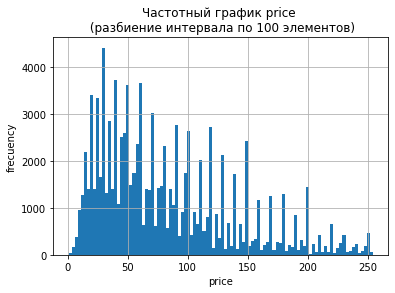

In [43]:
# смотрим как изменилось распределение переменной price
n, bins, patches = plt.hist(order_items_MADfiltered['price'], 100)

plt.xlabel('price')
plt.ylabel('frecuency')
plt.title('Частотный график price \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [71]:
# номер записи с медианой для нечетного кол-ва записей
int((order_items_MADfiltered.shape[0]+1)/2)

51595

In [72]:
# отсортируем массив по freight_value и разделим его на две части (по номеру записи с медианой)
# df3 = order_items_MADfiltered.sort_values('freight_value').iloc[:int((order_items_MADfiltered.shape[0]+1)/2), :] # до 51595-ой, всего 103189 записей 
# df4 = order_items_MADfiltered.sort_values('freight_value').iloc[int((order_items_MADfiltered.shape[0]+1)/2):, :] # с 51596-ой, всего 103189 записей

df3 = order_items_MADfiltered.sort_values('freight_value').iloc[:int((order_items_MADfiltered.shape[0]+1)/2)] # до 51595-ой, всего 103189 записей 
df4 = order_items_MADfiltered.sort_values('freight_value').iloc[int((order_items_MADfiltered.shape[0]+1)/2):] # с 51596-ой, всего 103189 записей

In [56]:
order_items_MADfiltered['freight_value'].median()

15.95

In [70]:
df4.describe()

,order_item_id,price,freight_value
count,51594.000000,51594.000000,51594.000000
mean,1.188937,99.098493,24.938660
std,0.641146,58.463767,13.590524
min,1.000000,0.850000,15.950000
25%,1.000000,49.990000,17.740000
50%,1.000000,89.900000,19.760000
75%,1.000000,139.000000,26.320000
max,15.000000,254.400000,299.160000


In [73]:
df3['deviation_freight_value'] = (df3['freight_value'] - order_items_MADfiltered['freight_value'].median()).abs()
Left_MAD_ = order_items_MADfiltered['freight_value'].median()-3*df3['deviation_freight_value'].median()
print(f'Left_MAD_: {Left_MAD_:.2f}')

Left_MAD_: 6.47


In [74]:
df4['deviation_freight_value'] = (df4['freight_value'] - order_items_MADfiltered['freight_value'].median()).abs()
Right_MAD_ = order_items_MADfiltered['freight_value'].median()+3*df4['deviation_freight_value'].median()
print(f'Right_MAD_: {Right_MAD_:.2f}')

Right_MAD_: 27.38


In [75]:
print(f'freight_value: {Left_MAD_:.2f} - {Right_MAD_:.2f}')

freight_value: 6.47 - 27.38


In [76]:
order_items_MADfiltered_ = order_items_MADfiltered[(order_items_MADfiltered['freight_value'] < Right_MAD_) & (order_items_MADfiltered['freight_value'] > Left_MAD_)]
order_items_MADfiltered_.shape

(90302, 7)

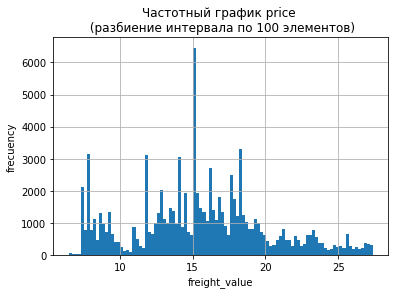

In [77]:
# смотрим как изменилось распределение переменной freight_value
n, bins, patches = plt.hist(order_items_MADfiltered_['freight_value'], 100)

plt.xlabel('freight_value')
plt.ylabel('frecuency')
plt.title('Частотный график price \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

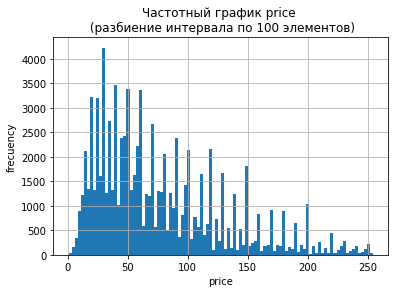

In [78]:
# смотрим как изменилось распределение переменной price
n, bins, patches = plt.hist(order_items_MADfiltered_['price'], 100)

plt.xlabel('price')
plt.ylabel('frecuency')
plt.title('Частотный график price \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

### квантили 0,01 и 0,99

In [40]:
# считаем квантили 0,01 и 0,99 для переменной price
q_low = order_items['price'].quantile(.01)
q_hi = order_items['price'].quantile(.99)
# print(q_low, q_hi)

In [41]:
# исключим значения за пределами этих квантилей
order_items_filtered = order_items[(order_items['price'] < q_hi) & (order_items['price'] > q_low)]
# order_items_filtered = order_items[order_items['price'] < q_hi]
order_items_filtered.shape

(110333, 7)

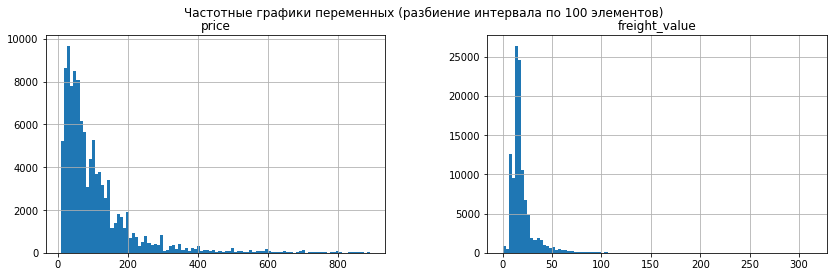

In [43]:
# Смотрим, как изменились распределения переменных
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items_filtered[['price']].hist('price', bins=100, ax=axes[0])
order_items_filtered[['freight_value']].hist('freight_value', bins=100, ax=axes[1])
fig.suptitle('Частотные графики переменных (разбиение интервала по 100 элементов)', fontsize=12)
plt.show()

In [49]:
# считаем квантили 0,01 и 0,99 для переменной freight_value
q_low_ = order_items_filtered['freight_value'].quantile(.01)
q_hi_ = order_items_filtered['freight_value'].quantile(.99)
# print(q_low, q_hi)

In [50]:
# исключим значения за пределами этих квантилей
order_items_filtered_ = order_items_filtered[(order_items_filtered['freight_value'] < q_hi_) & \
                                             (order_items_filtered['freight_value'] > q_low_)]
# order_items_filtered = order_items[order_items['price'] < q_hi]
order_items_filtered_.shape

(108123, 7)

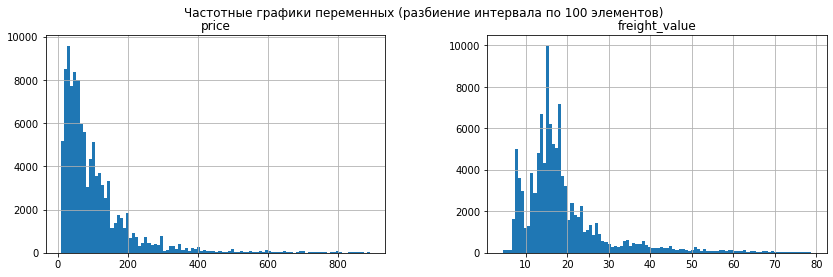

In [51]:
# Смотрим, как изменились распределения переменных
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items_filtered_[['price']].hist('price', bins=100, ax=axes[0])
order_items_filtered_[['freight_value']].hist('freight_value', bins=100, ax=axes[1])
fig.suptitle('Частотные графики переменных (разбиение интервала по 100 элементов)', fontsize=12)
plt.show()